# `EDA and Feature Engineering`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
df = pd.read_csv('../2. Ridge Lasso and ElasticNet Regression\\Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [9]:
df.shape

(246, 14)

In [12]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

* 1-`Except day column each column has missing value`

In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

* 2-`Columns names has extra spaces`

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


* 3-`All the columns has type Object need to change them in their respective type`

In [16]:
## checking missing values row wise 
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


* 4-`We have only two row which has missing values, need to remove them`

In [18]:
df['Classes  '].value_counts()

Classes  
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: count, dtype: int64

* 5-`Classes column has also categories with extra spacies which makes them unique category, need to manage them`

In [43]:
df['Temperature'].value_counts()

Temperature
35             29
31             25
34             24
33             23
30             22
32             21
36             21
29             18
28             15
37              8
27              8
25              6
39              6
26              5
38              3
24              3
40              3
22              2
Temperature     1
42              1
Name: count, dtype: int64

6-`Temperature word appear in temperature column`

In [69]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

* `Extra Speces in each category `

## **Data Cleaning**

#### `We have Identified few main problems in the dataset not we clean it step by step`

In [20]:
df.shape

(246, 14)

In [ ]:
### Solving problem 1 and 4
df.drop(index=[122,167],axis=0,inplace=True)  ## Removing 2 rows 

In [22]:
df.shape

(244, 14)

In [23]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [25]:
## problem 2 -> Extra Speces solution

In [26]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [27]:
## removing extra speces 
df.columns = df.columns.str.strip()

In [28]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [31]:
### Problem 5 => Removing day , month , year columns from data
df.drop(columns=['day','month','year'],axis=1,inplace=True)

In [44]:
df[df['Temperature']=='Temperature']

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [45]:
df.drop(index=[123],inplace=True)

In [46]:
df.reset_index(inplace=True)

In [47]:
## Problem 3 ==> Assigning problem type to a columns
df.dtypes

index           int64
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [66]:
df.drop('index',axis=1,inplace=True)

In [50]:
df[['Temperature','RH','Ws']] = df[['Temperature','RH','Ws']].astype(int)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        243 non-null    int64 
 1   Temperature  243 non-null    int64 
 2   RH           243 non-null    int64 
 3   Ws           243 non-null    int64 
 4   Rain         243 non-null    object
 5   FFMC         243 non-null    object
 6   DMC          243 non-null    object
 7   DC           243 non-null    object
 8   ISI          243 non-null    object
 9   BUI          243 non-null    object
 10  FWI          243 non-null    object
 11  Classes      243 non-null    object
dtypes: int64(4), object(8)
memory usage: 22.9+ KB


In [ ]:
df.iloc[:,4:-1]

,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,0,65.7,3.4,7.6,1.3,3.4,0.5
1,1.3,64.4,4.1,7.6,1,3.9,0.4
2,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,2.5,28.6,1.3,6.9,0,1.7,0
4,0,64.8,3,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...
238,0,85.4,16,44.5,4.5,16.9,6.5
239,4.4,41.1,6.5,8,0.1,6.2,0
240,0.5,45.9,3.5,7.9,0.4,3.4,0.2
241,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [63]:
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [67]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
dtypes: float64(7), int64(3), object(1)
memory usage: 21.0+ KB


In [ ]:
## Problem 6 
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [71]:
# problem 6  : Extra speces problem
df['Classes'].str.strip().value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [73]:
df['Classes'] = df['Classes'].str.strip()
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [74]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [75]:
## Problem 7 Encoding the Classes columns 
# fire =1, and not fire =0
df['Classes'] = df['Classes'].map({'fire':1,'not fire':0})

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 21.0 KB


### `Now Data is Completely Clean`

In [77]:
df.sample(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
222,29,74,15,1.1,59.5,4.7,8.2,0.8,4.6,0.3,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0
70,35,55,14,0.0,88.9,18.6,67.0,7.4,21.9,11.6,1
33,33,78,17,0.0,80.1,4.6,18.5,2.7,5.7,1.7,0
205,35,38,15,0.0,92.1,51.3,147.7,12.2,54.9,26.9,1
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0.9,0
220,30,88,14,0.0,82.5,6.6,26.1,3.0,8.1,2.7,1
185,38,35,15,0.0,93.8,23.0,42.7,15.7,22.9,20.9,1


In [78]:
df_copy = df.copy()

In [79]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


### Getting Insights about data through **EXPLORATORY DATA ANALYSIS**

Text(0, 0.5, 'Frequency')

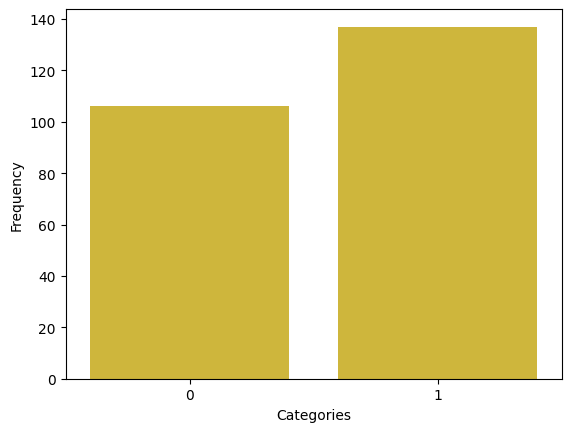

In [ ]:

frequency = df_copy.Classes.value_counts()
sns.barplot(frequency,color="#E6C624")
plt.xlabel('Categories')
plt.ylabel('Frequency')

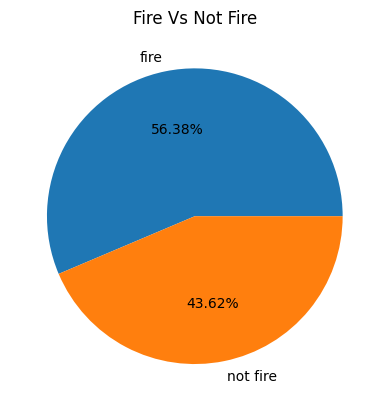

In [98]:
labels = ['fire','not fire']
plt.pie(df['Classes'].value_counts(normalize=True)*100,autopct='%.2f%%',labels=labels)
plt.title('Fire Vs Not Fire')
plt.show()

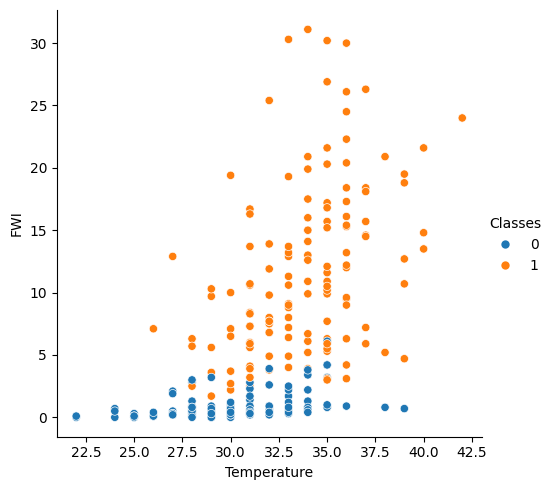

In [103]:
sns.relplot(x='Temperature',y='FWI',data=df_copy,hue='Classes')

`This show that Fire category has high FWI values where as Not Fire has low FWI values`

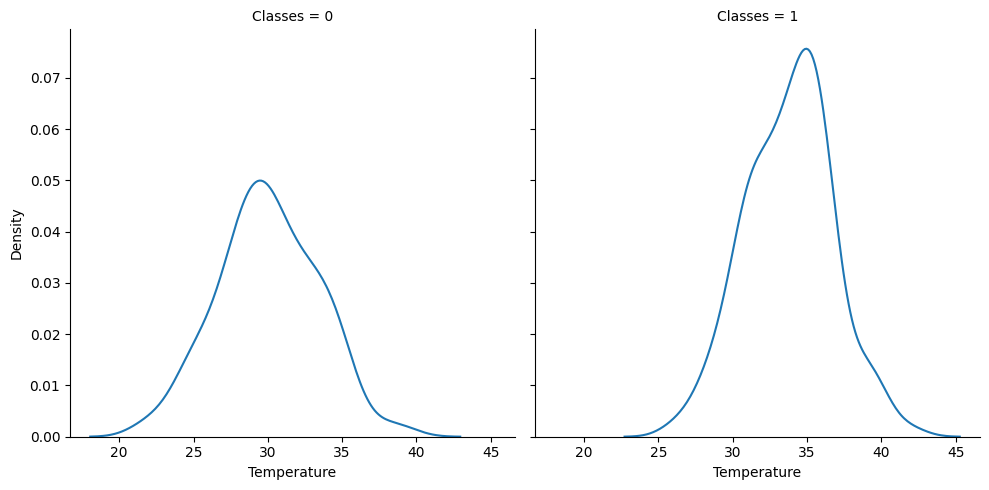

In [110]:
sns.displot(data=df_copy,x='Temperature',col='Classes',kind='kde')# 


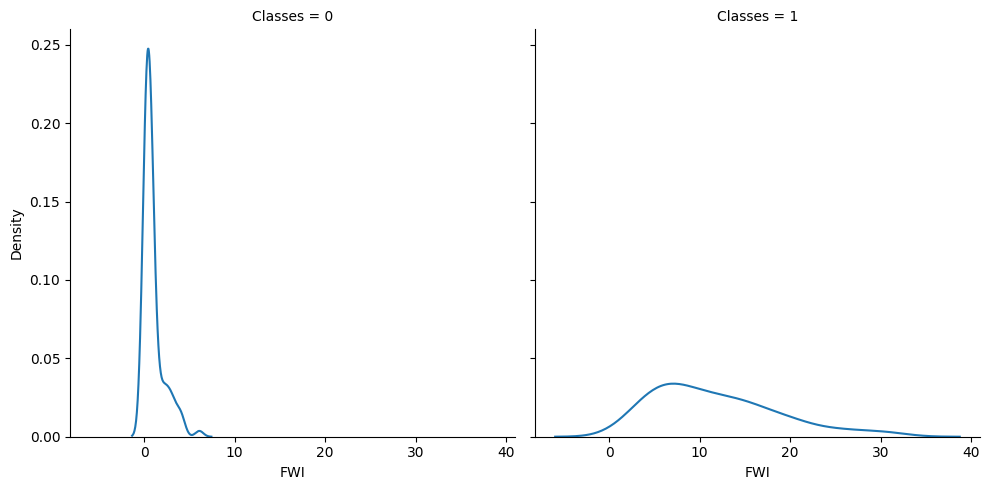

In [111]:
sns.displot(data=df_copy,x='FWI',col='Classes',kind='kde')

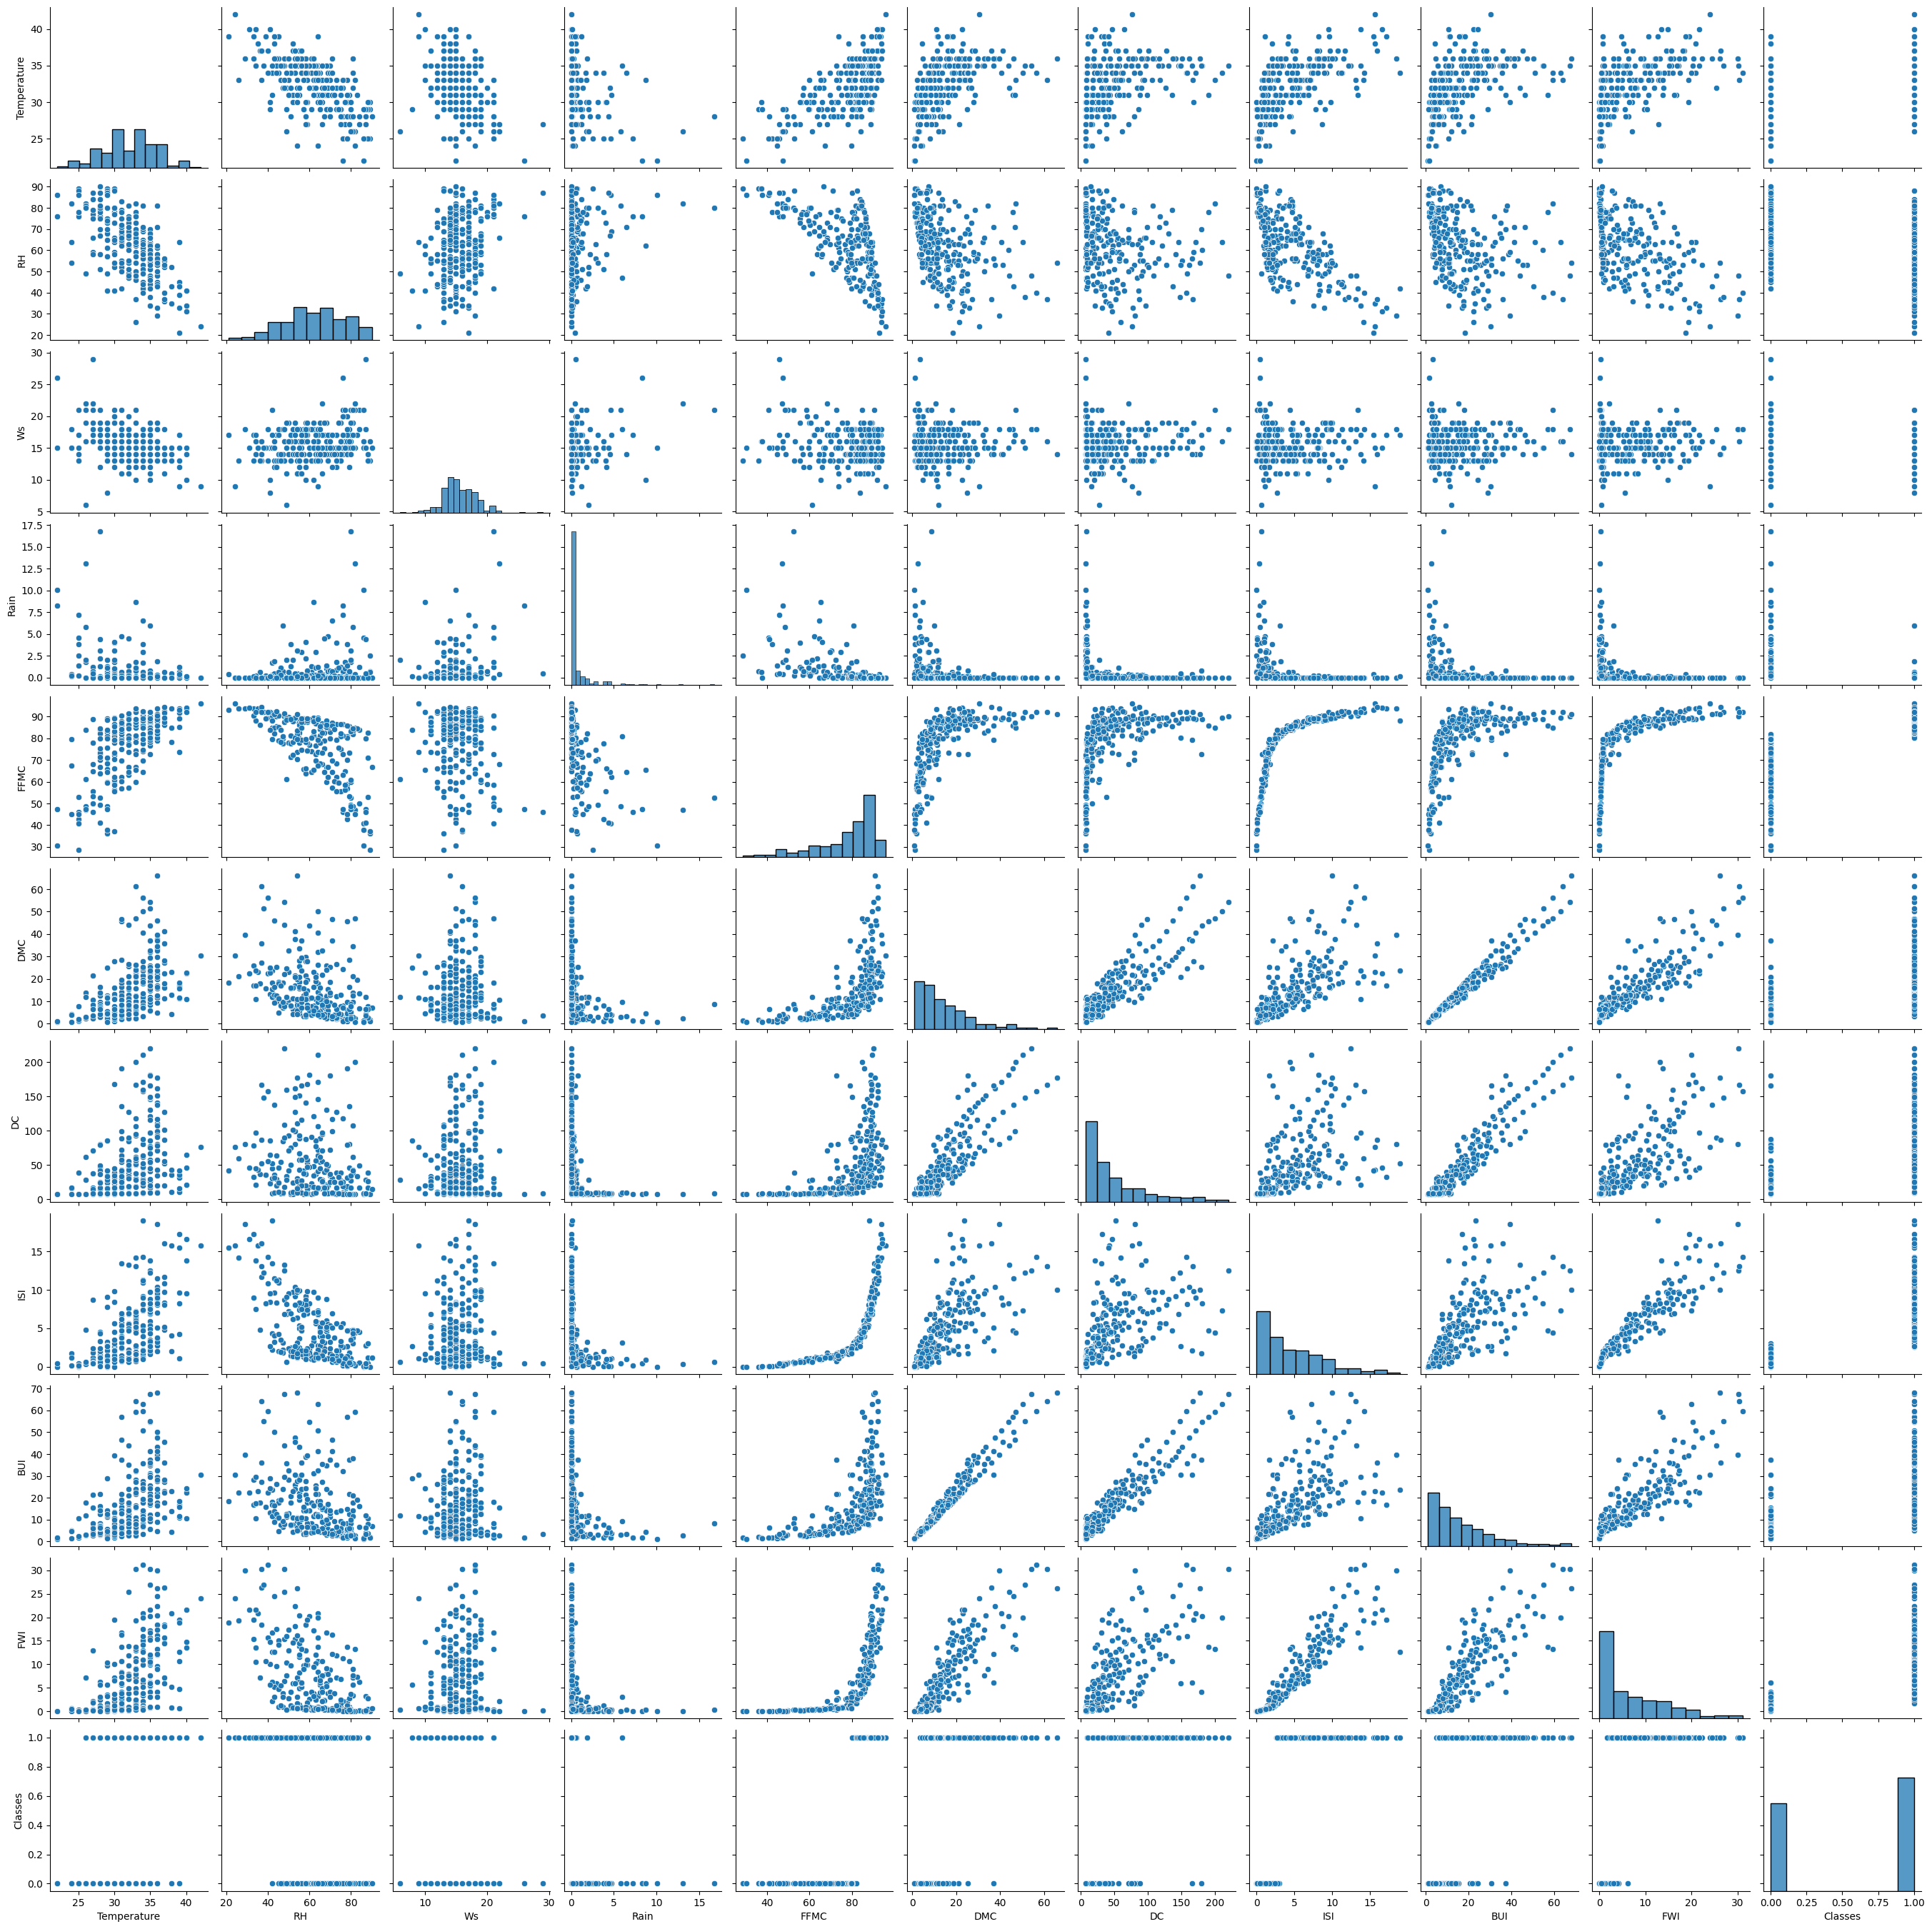

In [120]:
sns.pairplot(df_copy)

`This plot show that mostly our columns has linear relationship either +ive or -ive`

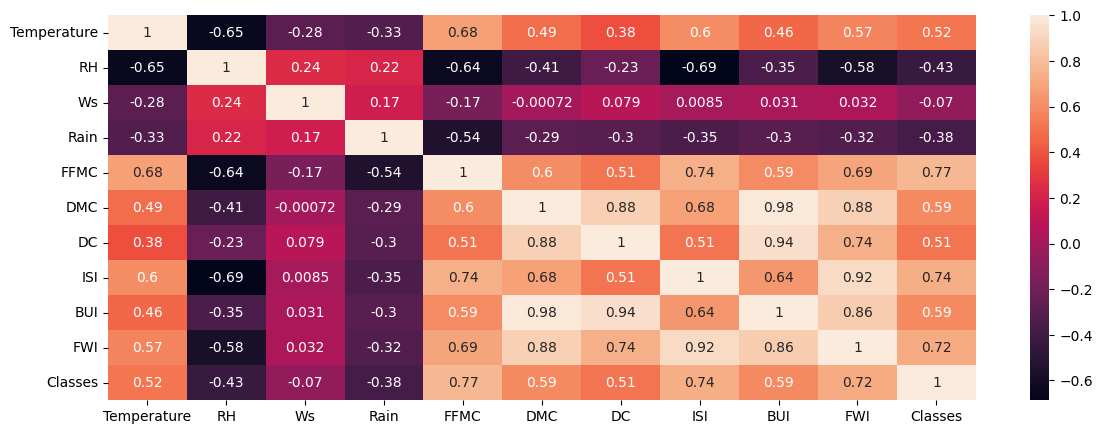

In [125]:
plt.figure(figsize=(14,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [131]:
df.to_csv('clean_data.csv',index=False)